<a href="https://colab.research.google.com/github/miller00315/ia_studies/blob/main/introduction_to_computer_vision_with_tensor_flow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convulotional Neural Network and Computer Vision with TensorFlow

Computer vision is the practice of writing algorihitms which can discover patterns in visual data. Such as the camera of a self-driving car recogninzing the car in front.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import zipfile

## Get the data

The image we're working with are from the Food101 dataset (101 fierent classes of food).

However we've modified it to only use two classes (pizza 🍕 & steak 🐄) using the image data modification notebook.

> 🔑 **Note:** We start with a smaller dataset so we can expiriment quickly and figure what works (or better yet what doesn't work) before scaling up.

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-05-18 05:14:12--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.180.207, 142.251.172.207, 142.251.171.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.180.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   228MB/s    in 0.5s    

2024-05-18 05:14:12 (228 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]



## Inspecting the data (become one with it)

A very cuccial step ate teh begining of any machine learning project is becoming one with the data.

And for a computer vision project.. this usually means visualizing many samples of our data.

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1598345.jpg  2062248.jpg  2548974.jpg  3030578.jpg  3571963.jpg  510757.jpg
100135.jpg   1598885.jpg  2081995.jpg  2549316.jpg  3047807.jpg  3576078.jpg  513129.jpg
101312.jpg   1600179.jpg  2087958.jpg  2561199.jpg  3059843.jpg  3577618.jpg  513842.jpg
1021458.jpg  1600794.jpg  2088030.jpg  2563233.jpg  3074367.jpg  3577732.jpg  523535.jpg
1032846.jpg  160552.jpg   2088195.jpg  256592.jpg   3082120.jpg  3578934.jpg  525041.jpg
10380.jpg    1606596.jpg  2090493.jpg  2568848.jpg  3094354.jpg  358042.jpg   534560.jpg
1049459.jpg  1615395.jpg  2090504.jpg  2573392.jpg  3095301.jpg  358045.jpg   534633.jpg
1053665.jpg  1618011.jpg  2125877.jpg  2592401.jpg  3099645.jpg  3591821.jpg  536535.jpg
1068516.jpg  1619357.jpg  2129685.jpg  2599817.jpg  3100476.jpg  359330.jpg   541410.jpg
1068975.jpg  1621763.jpg  2133717.jpg  2603058.jpg  3110387.jpg  3601483.jpg  543691.jpg
1081258.jpg  1623325.jpg  2136662.jpg  2606444.jpg  3113772.jpg  3606642.jpg  560503.jpg
1090122.jpg  1624450.

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:
# The extra file in our pizza_steak directory is ".DS_Store"
!ls -la pizza_steak

total 16
drwxr-xr-x 4 root root 4096 May 18 04:32 .
drwxr-xr-x 1 root root 4096 May 18 05:14 ..
drwxr-xr-x 4 root root 4096 May 18 04:32 test
drwxr-xr-x 4 root root 4096 May 18 04:32 train


In [ ]:
# Another way to find out how many images are in a file

num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
# Get the class name programamtically

import pathlib
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # create a list of classes names from subdirectories
print(class_names)

['pizza' 'steak']


In [2]:
# Let's visualize our images
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  print(random_image)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

['3011642.jpg']
Image shape: (384, 512, 3)


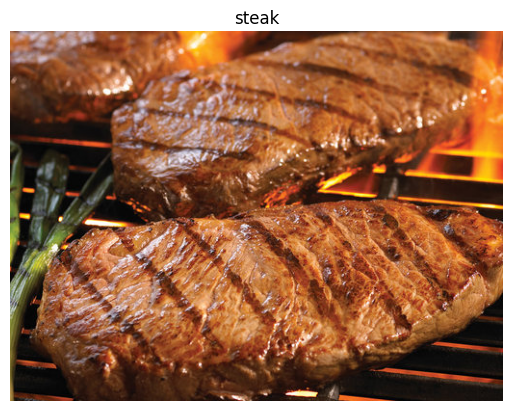

In [ ]:
# View a random image from the training dataset

img = view_random_image(target_dir="pizza_steak/train/",
                 target_class=random.choice(class_names))

In [ ]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values

tf.constant(img)

<tf.Tensor: shape=(384, 512, 3), dtype=uint8, numpy=
array([[[165, 109,  84],
        [164, 107,  87],
        [158, 101,  81],
        ...,
        [210,  88,  37],
        [219,  95,  41],
        [220,  97,  40]],

       [[176, 120,  93],
        [174, 118,  93],
        [170, 114,  91],
        ...,
        [209,  89,  37],
        [216,  95,  40],
        [216,  95,  38]],

       [[188, 134, 100],
        [187, 130, 100],
        [185, 128, 101],
        ...,
        [205,  89,  38],
        [211,  94,  40],
        [210,  94,  37]],

       ...,

       [[177, 139,  64],
        [162, 128,  57],
        [142, 113,  53],
        ...,
        [ 21,  17,  14],
        [ 21,  17,  14],
        [ 23,  19,  16]],

       [[176, 138,  65],
        [158, 125,  54],
        [139, 113,  52],
        ...,
        [ 20,  16,  13],
        [ 22,  18,  15],
        [ 24,  20,  17]],

       [[173, 136,  66],
        [152, 121,  54],
        [136, 112,  52],
        ...,
        [ 20,  16,  1

In [ ]:
# View the miage shape

img.shape # return width, height, colour channels

(384, 512, 3)

In [ ]:
# Get all the pixels values between zero and 1

img / 255.

array([[[0.64705882, 0.42745098, 0.32941176],
        [0.64313725, 0.41960784, 0.34117647],
        [0.61960784, 0.39607843, 0.31764706],
        ...,
        [0.82352941, 0.34509804, 0.14509804],
        [0.85882353, 0.37254902, 0.16078431],
        [0.8627451 , 0.38039216, 0.15686275]],

       [[0.69019608, 0.47058824, 0.36470588],
        [0.68235294, 0.4627451 , 0.36470588],
        [0.66666667, 0.44705882, 0.35686275],
        ...,
        [0.81960784, 0.34901961, 0.14509804],
        [0.84705882, 0.37254902, 0.15686275],
        [0.84705882, 0.37254902, 0.14901961]],

       [[0.7372549 , 0.5254902 , 0.39215686],
        [0.73333333, 0.50980392, 0.39215686],
        [0.7254902 , 0.50196078, 0.39607843],
        ...,
        [0.80392157, 0.34901961, 0.14901961],
        [0.82745098, 0.36862745, 0.15686275],
        [0.82352941, 0.36862745, 0.14509804]],

       ...,

       [[0.69411765, 0.54509804, 0.25098039],
        [0.63529412, 0.50196078, 0.22352941],
        [0.55686275, 0

## An end-to-end example

Let's build a convolutional neural network to find paterns in our images, more specifically we a need way to:

* Load our images
* prepocess our images
* Build a CMM to find patterns in our images
* Compile our CNN
* Fit CNN to our training data

[Polo club](https://poloclub.github.io/cnn-explainer/)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed

tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 and 1, also called scalling/normalization )
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and validation directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # binary labels
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Build a CNN model (same as Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          strides=1,
                          activation="relu",
                          input_shape=(224, 224, 3)
                         ),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
 ])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit our CNN
model_1_history =  model_1.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 13s 185ms/step - loss: 0.6041 - accuracy: 0.6587 - val_loss: 0.3816 - val_accuracy: 0.8380
Epoch 2/5
47/47 [==============================] - 8s 163ms/step - loss: 0.4150 - accuracy: 0.8180 - val_loss: 0.3636 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 6s 125ms/step - loss: 0.3874 - accuracy: 0.8320 - val_loss: 0.3076 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 6s 131ms/step - loss: 0.3432 - accuracy: 0.8520 - val_loss: 0.2899 - val_accuracy: 0.8860
Epoch 5/5
47/47 [==============================] - 6s 122ms/step - loss: 0.3127 - accuracy: 0.8727 - val_loss: 0.3193 - val_accuracy: 0.8580


> 🔑 **Note:** if the above cell is taking more than ~10 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime type -> Hadware aceleration -> GPU

In [ ]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

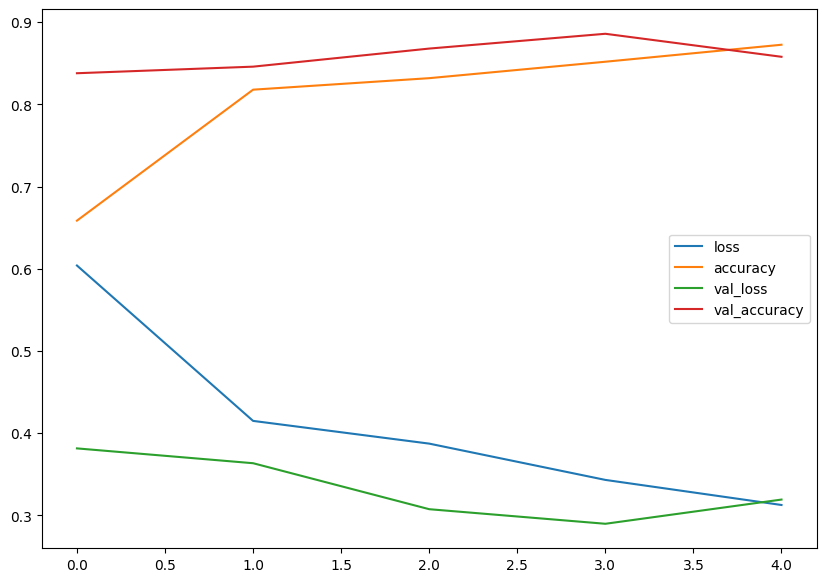

In [ ]:
import pandas as pd

# Plot the loss curves
pd.DataFrame(model_1_history.history).plot(figsize=(10, 7))
plt.show()

In [ ]:
model_1.evaluate(valid_data)

16/16 [==============================] - 2s 118ms/step - loss: 0.3193 - accuracy: 0.8580


[0.3193402588367462, 0.8579999804496765]

##Using the same model as before

Let's replicate the model we've built in the previous section to see if it works with our image data.

The model we're building is from the tensor flow playground:



In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create a model to teplicate the Tensoflow playground model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fite the model
model_2_history = model_2.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 6s 109ms/step - loss: 0.7826 - accuracy: 0.5027 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 118ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 5s 110ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 6s 129ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 142ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [ ]:
model_2.evaluate(valid_data)

16/16 [==============================] - 1s 83ms/step - loss: 0.6932 - accuracy: 0.5000


[0.6931583881378174, 0.5]

In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602141 (2.30 MB)
Trainable params: 602141 (2.30 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Despite having 20x more parameters than our CNN,model_2 perfrom terribly.. let's try imporve it...

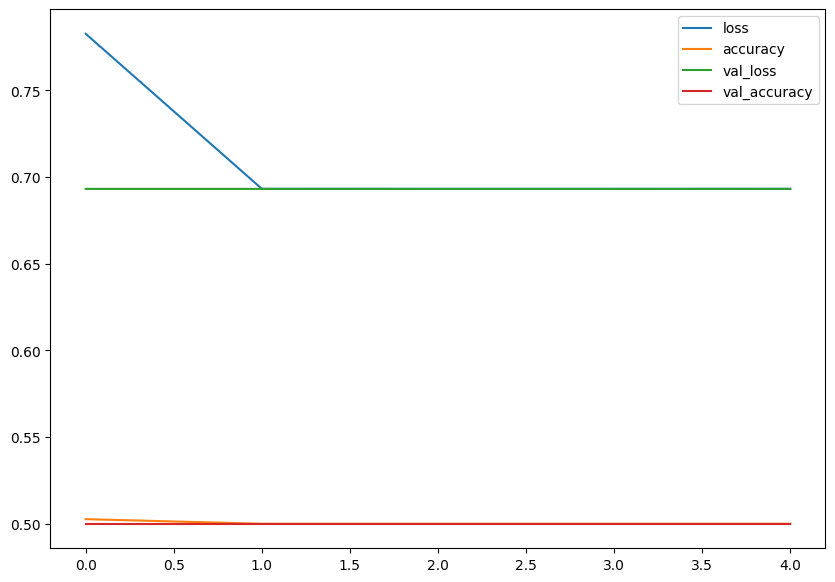

In [ ]:
pd.DataFrame(model_2_history.history).plot(figsize=(10, 7))
plt.show()

In [ ]:
# Set random seed
tf.random.set_seed(42)

# Create teh model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(
  loss="binary_crossentropy",
  optimizer=tf.keras.optimizers.Adam(),
  metrics=["accuracy"]
)

# Fit the model
history_3 = model_3.fit(
  train_data,
  epochs=5,
  steps_per_epoch=len(train_data),
  validation_data=valid_data,
  validation_steps=len(valid_data)
)

Epoch 1/5
47/47 [==============================] - 7s 114ms/step - loss: 3.1715 - accuracy: 0.6013 - val_loss: 1.6552 - val_accuracy: 0.6420
Epoch 2/5
47/47 [==============================] - 6s 127ms/step - loss: 1.2435 - accuracy: 0.6853 - val_loss: 1.1807 - val_accuracy: 0.5660
Epoch 3/5
47/47 [==============================] - 6s 126ms/step - loss: 0.6113 - accuracy: 0.7227 - val_loss: 0.5244 - val_accuracy: 0.7560
Epoch 4/5
47/47 [==============================] - 5s 114ms/step - loss: 0.7317 - accuracy: 0.7047 - val_loss: 0.8551 - val_accuracy: 0.6500
Epoch 5/5
47/47 [==============================] - 6s 128ms/step - loss: 0.5441 - accuracy: 0.7567 - val_loss: 0.5520 - val_accuracy: 0.7320


In [ ]:
model_3.evaluate(valid_data)

16/16 [==============================] - 1s 83ms/step - loss: 0.5520 - accuracy: 0.7320


[0.5519904494285583, 0.7319999933242798]

In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15073201 (57.50 MB)
Trainable params: 15073201 (57.50 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


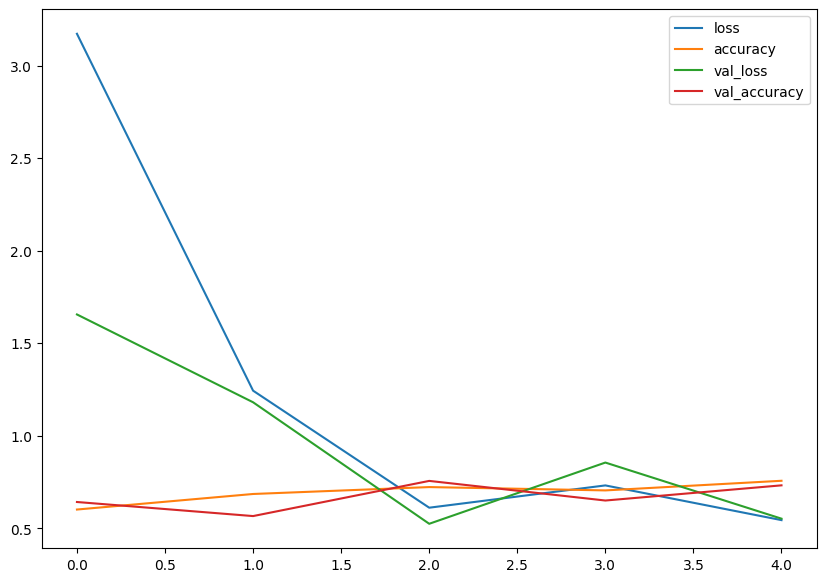

In [ ]:
pd.DataFrame(history_3.history).plot(figsize=(10, 7))
plt.show()

## Binary clasification: Let's break it down

1. Become one with the data (Visualize, Visualize, Visualize)
2. Preprocess the dta (prepared if for our model, the main step here scalling/normalizing and turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust parameters and improve the model (try to bear outr baseline)
7. Repeat until satified

### 1. Become one with the data

['421561.jpg']
Image shape: (382, 512, 3)
['302591.jpg']
Image shape: (512, 382, 3)


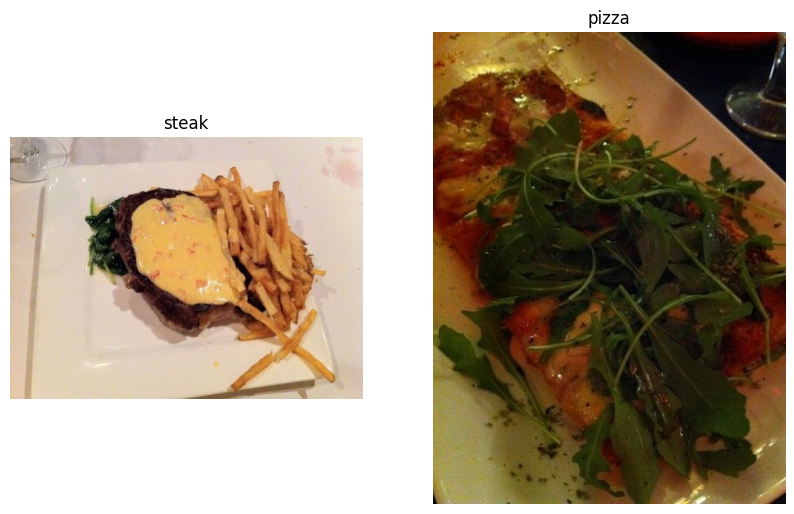

In [ ]:
# Visualize data

plt.figure(figsize=(10, 7))

plt.subplot(1, 2, 1)
steake_img = view_random_image("pizza_steak/train/", "steak")

plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [ ]:
## Define dicrectory data set paths

train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next steps is to turn our dta into **batches**.

A batch is a small subset of data. Rather than look at all ~10,000 images at a time , amodel might only look at 32 at a time.

It does this for a couple of reasons:

1. 10,000 images (or more) might not fit into the memory of your processor (GPU).
2. trying to learn teh patterns in 10,0000 images in one hit could result in the model no being able to learn very well.

Why 32?

Because 32 is good for your health...

In [ ]:
!nvidia-smi

Sat May 18 05:16:49 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P0              28W /  70W |   1665MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
# Create train and test data generator and rescale the data

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)



In [ ]:
# Load in our image data from directories and turn them into batches

train_data = train_datagen.flow_from_directory(train_dir,# Target directory of images
                                               batch_size=32, # Size of minibatches
                                               target_size=(224, 224), # Target size of images (height, width)
                                               class_mode="binary", # type of data you're working with
                                               seed=42) # size of minibatches

valid_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labes
len(images), len(labels)

(32, 32)

In [ ]:
len(train_data)

47

In [ ]:
# Get the first two images

images[:2], images[0].shape

(array([[[[0.42352945, 0.43137258, 0.34509805],
          [0.3137255 , 0.32941177, 0.2392157 ],
          [0.26666668, 0.28235295, 0.18431373],
          ...,
          [0.42352945, 0.34509805, 0.3803922 ],
          [0.427451  , 0.34901962, 0.39607847],
          [0.45098042, 0.36862746, 0.427451  ]],
 
         [[0.2901961 , 0.30588236, 0.21568629],
          [0.45882356, 0.47450984, 0.37647063],
          [0.2627451 , 0.28627452, 0.18431373],
          ...,
          [0.39607847, 0.34117648, 0.34117648],
          [0.4156863 , 0.36862746, 0.38431376],
          [0.39607847, 0.34901962, 0.3647059 ]],
 
         [[0.3647059 , 0.40000004, 0.29411766],
          [0.38823533, 0.42352945, 0.31764707],
          [0.30588236, 0.34117648, 0.23529413],
          ...,
          [0.34509805, 0.3254902 , 0.30980393],
          [0.30980393, 0.29803923, 0.2784314 ],
          [0.3372549 , 0.3254902 , 0.30588236]],
 
         ...,
 
         [[0.5137255 , 0.5019608 , 0.54509807],
          [0.52156

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
# View the first batch of labels

In [ ]:
labels

array([1., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1.,
       0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model existing result that you setup whem begining a machine learning experiment, you try to beat the baseline.

> 🔑 **Note:** In deep learning, there is almost an infinite amount od architectures you could create. So one of the best ways to get start with something simple and see if it works on your dta and then introduce complexity as required (e.g. look at which curent model is performing best in the field for your problem)

[Papers with code](https://paperswithcode.com/sota)

In [3]:
# Make the creating our model a littel esasier

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation
from tensorflow.keras.models import Sequential

In [ ]:
# Create the mdoel (this will be our baseline, a layer concolutional neural network)

model_4 = Sequential([
  Conv2D(filters=10,# filter is the number of sliding windows going across an input (higher = most compress model)
         kernel_size=(3, 3), # the size of sliding window going across an input
         strides=1, # the size of the step the sliding window takes across an input
         padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
         activation="relu",
         input_shape=(224, 224, 3)), # input layer specify input shape
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # output layer (working wth binary clssification so only 1 output neuron)
])


model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])


# Fit the model
history_4 = model_4.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 158ms/step - loss: 1.1284 - accuracy: 0.6620 - val_loss: 0.4441 - val_accuracy: 0.7880
Epoch 2/5
47/47 [==============================] - 6s 125ms/step - loss: 0.4448 - accuracy: 0.8007 - val_loss: 0.4280 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 6s 132ms/step - loss: 0.3097 - accuracy: 0.8820 - val_loss: 0.3418 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 6s 123ms/step - loss: 0.1471 - accuracy: 0.9540 - val_loss: 0.3464 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 6s 137ms/step - loss: 0.0506 - accuracy: 0.9927 - val_loss: 0.4440 - val_accuracy: 0.8120


https://poloclub.github.io/cnn-explainer/

In [ ]:
model_4.evaluate(valid_data)

16/16 [==============================] - 2s 92ms/step - loss: 0.4440 - accuracy: 0.8120


[0.4440156817436218, 0.8119999766349792]

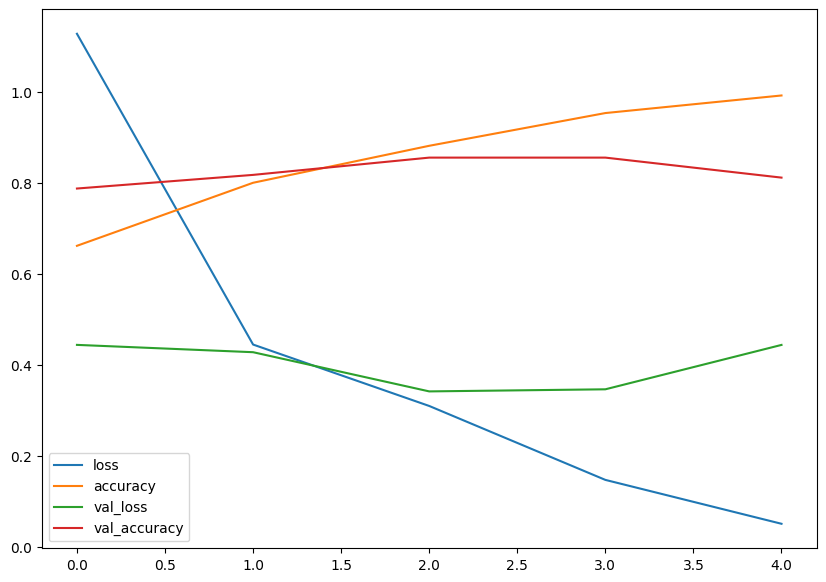

In [ ]:
pd.DataFrame(history_4.history).plot(figsize=(10, 7))
plt.show()

In [ ]:
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


###4. Fit the model

In [ ]:
# Check the lengths of training and test data generators

len(train_data), len(valid_data)

(47, 16)

In [ ]:
# Fit the model

history_4 = model_4.fit(train_data, #This is a combination fo labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 141ms/step - loss: 0.2087 - accuracy: 0.9440 - val_loss: 0.4287 - val_accuracy: 0.8220
Epoch 2/5
47/47 [==============================] - 6s 122ms/step - loss: 0.0199 - accuracy: 0.9987 - val_loss: 0.4668 - val_accuracy: 0.8280
Epoch 3/5
47/47 [==============================] - 7s 158ms/step - loss: 0.0073 - accuracy: 0.9993 - val_loss: 0.5023 - val_accuracy: 0.8320
Epoch 4/5
47/47 [==============================] - 6s 124ms/step - loss: 0.0040 - accuracy: 1.0000 - val_loss: 0.5676 - val_accuracy: 0.8280
Epoch 5/5
47/47 [==============================] - 7s 140ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.5379 - val_accuracy: 0.8220


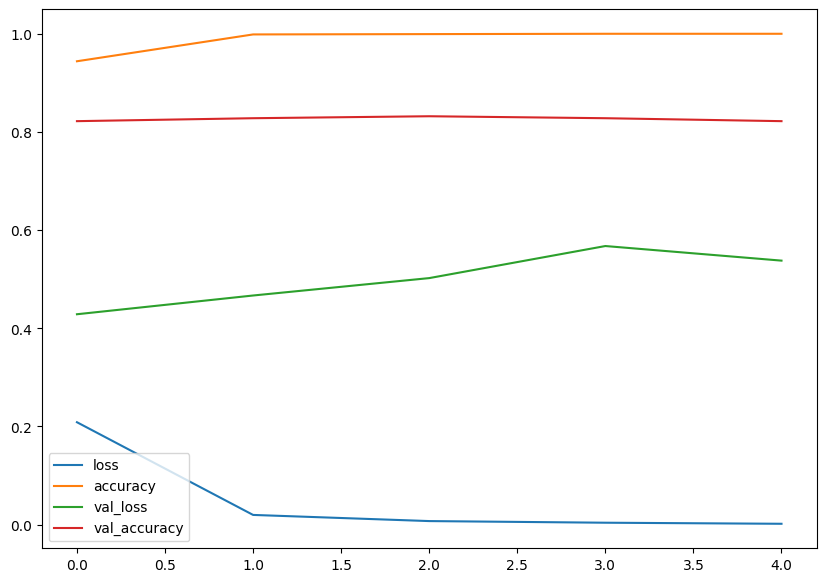

In [ ]:
pd.DataFrame(history_4.history).plot(figsize=(10, 7))
plt.show()

In [ ]:
model_4.evaluate(valid_data)

16/16 [==============================] - 1s 80ms/step - loss: 0.5379 - accuracy: 0.8220


[0.5378853678703308, 0.8220000267028809]

###5. Evaluating the model

Its looks like our model is learning something, let's evaluate it.

In [4]:
# Plot the validation and training curves separately

def plt_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.

  Args:
    history: TensorFlow model History object.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))
  plt.figure(figsize=(10, 7))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("Loss")
  plt.xlabel("Epochs")
  plt.legend()
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("Accuracy")
  plt.xlabel("Epochs")
  plt.legend()
  plt.show()

> 🔑 **Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learnind the patterns in the training dataset **to well** and thus teh model's ability to generalize to unseen dta will be diminished.

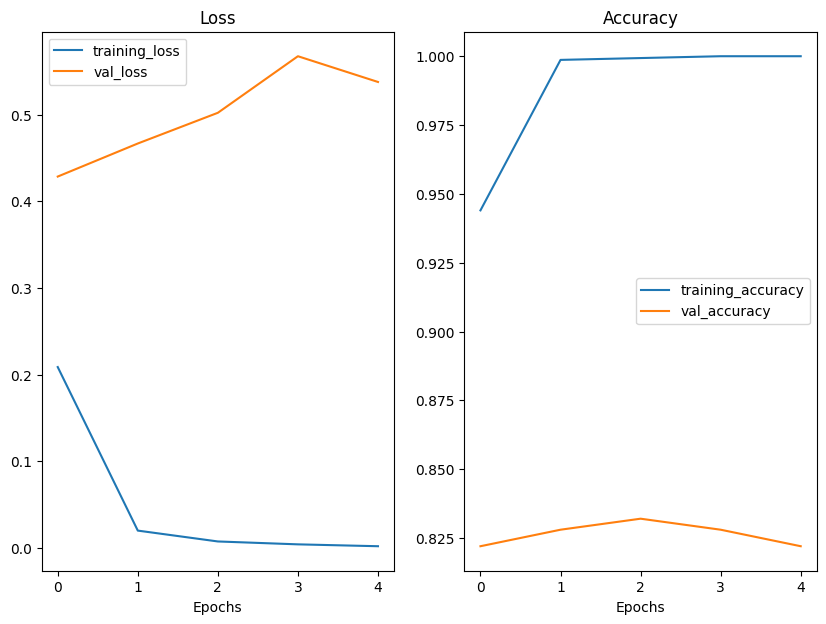

In [ ]:
plt_loss_curves(history_4)

### 6. Adjust the model parameters

Fittigng a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce the overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer


Reduce overfitting:

* Add data augmentation
* Add regularization layers (Such as MaxPool2D)
* Add more data...

In [ ]:
# Create the model (this going to be our new baseline)

model_5 = Sequential([
  Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(pool_size=2),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the model

model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_5 = model_5.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 141ms/step - loss: 0.6034 - accuracy: 0.6653 - val_loss: 0.4602 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 5s 116ms/step - loss: 0.4591 - accuracy: 0.8080 - val_loss: 0.3780 - val_accuracy: 0.8520
Epoch 3/5
47/47 [==============================] - 6s 133ms/step - loss: 0.4217 - accuracy: 0.8133 - val_loss: 0.3802 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 6s 132ms/step - loss: 0.3896 - accuracy: 0.8373 - val_loss: 0.3343 - val_accuracy: 0.8620
Epoch 5/5
47/47 [==============================] - 6s 127ms/step - loss: 0.3626 - accuracy: 0.8473 - val_loss: 0.3392 - val_accuracy: 0.8620


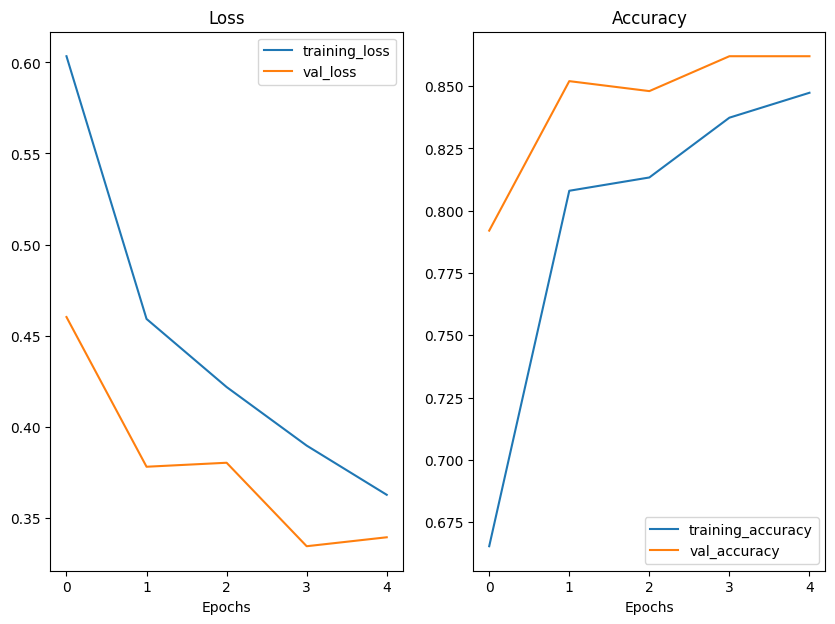

In [ ]:
plt_loss_curves(history_5)

In [ ]:
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 26, 26, 10)       

In [ ]:
model_5.evaluate(valid_data)

16/16 [==============================] - 2s 143ms/step - loss: 0.3392 - accuracy: 0.8620


[0.33923888206481934, 0.8619999885559082]

> 🔑 **Note:** Reducing overfitting is also known as **regularization**.

### Opening our bag of tricks and finding data augmentation

In [ ]:
# Create ImageDatGenerator training instance with dta augmentation

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                            rotation_range=0.2, # how much do you want to rotate a image?
                                            shear_range=0.2, # how much do you want to shear an images?
                                            zoom_range=0.2, # Zoom in randomly on an image
                                            width_shift_range=0.2, # move your image around on the x-axis
                                            height_shift_range=0.2, # move your image around on the y-axis
                                            horizontal_flip=True) # do you want to flip an image?


# Create Imagedategenerator without data augmentation

train_datagen = ImageDataGenerator(rescale=1./255)

# Cerate imagedateGenerator without data augmentation for test dataset

test_datagen = ImageDataGenerator(rescale=1./255)

> ❓ **Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to more diversity and it turn allowin our models to learn more generalizable (hopefully) patterns. Altering might mean adjustung the rotatio of an image, flipping it, cropping it or something similar.

In [ ]:
# Import dta and augment it from trainig director
print("Augmented training data:")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode="binary",
                                                                  shuffle=False)
print("Non-augmented training data:")
train_data = train_datagen.flow_from_directory(train_dir,
                                            target_size=(224, 224),
                                            batch_size=32,
                                            class_mode="binary",
                                            shuffle=False)


IMG_SHAPE = (224, 224, 3)
print('Non-augmented teste data:')
# Create non-augemented test dat batches
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMG_SHAPE[:2],
    batch_size=32,
    class_mode="binary",
)

Augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented training data:
Found 1500 images belonging to 2 classes.
Non-augmented teste data:
Found 500 images belonging to 2 classes.


> 🔑 **Note:** Data augmentation is usually only performed on the training dta. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loaded into the model.

Finally.. let's visualize some augmented dtata!!

In [ ]:
len(train_data_augmented), len(train_data)

(47, 47)

In [ ]:
# get sample augmente data

images, labes = train_data.next()

augmented_images, augmented_labeles = train_data_augmented.next() #note: labels aren't augmented... only data (images)

Showing image number: 12


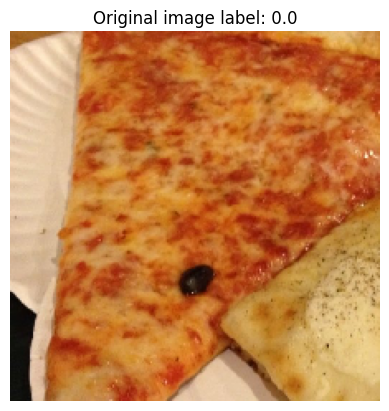

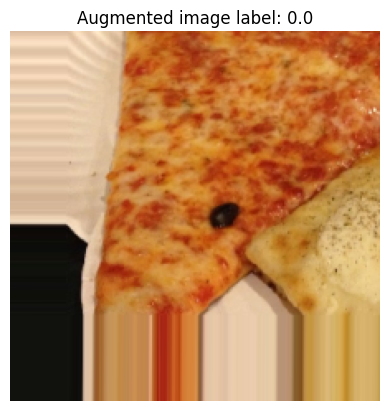

In [ ]:
import random

random_number = random.randint(0, 31)

print(f'Showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title(f'Original image label: {labes[random_number]}')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'Augmented image label: {augmented_labeles[random_number]}')
plt.axis(False)
plt.show()

Now e've seen what augmented trainig data looks like, let's build a model and see how it's learn

In [ ]:
# Create a model (ame as model 5)

In [ ]:
# Create the mdoel

model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
# Compile the mdoel

model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# Fit the model
history_6 = model_6.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 457ms/step - loss: 0.7108 - accuracy: 0.3960 - val_loss: 0.6931 - val_accuracy: 0.5380
Epoch 2/5
47/47 [==============================] - 22s 469ms/step - loss: 0.6982 - accuracy: 0.4567 - val_loss: 0.6927 - val_accuracy: 0.5300
Epoch 3/5
47/47 [==============================] - 21s 455ms/step - loss: 0.6930 - accuracy: 0.4933 - val_loss: 0.6921 - val_accuracy: 0.5660
Epoch 4/5
47/47 [==============================] - 24s 516ms/step - loss: 0.6919 - accuracy: 0.5500 - val_loss: 0.6868 - val_accuracy: 0.6860
Epoch 5/5
47/47 [==============================] - 22s 465ms/step - loss: 0.6872 - accuracy: 0.5813 - val_loss: 0.6687 - val_accuracy: 0.6980


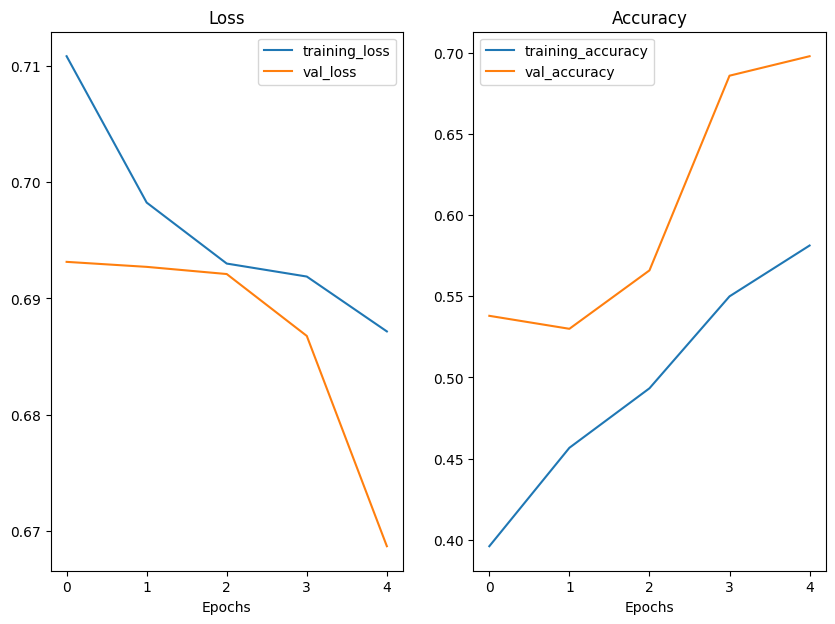

In [ ]:
plt_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens

In [ ]:
# Import dsta and augment it and shuffle from training directory

train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode="binary",
                                                                  shuffle=True)

Found 1500 images belonging to 2 classes.


Showing image number: 24


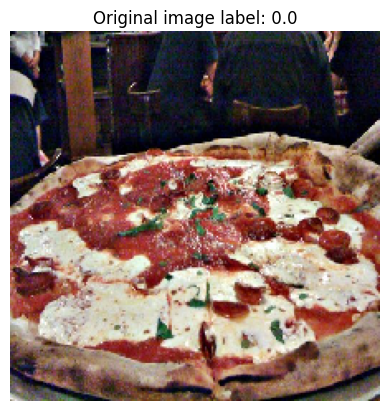

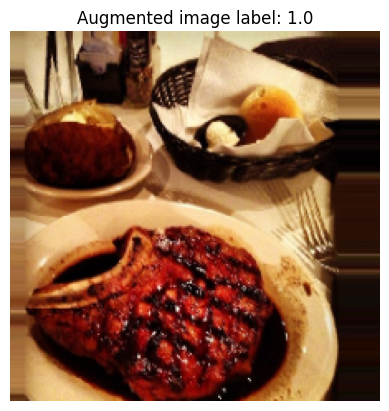

In [ ]:
import random

augmented_images, augmented_labeles = train_data_augmented_shuffled.next()

random_number = random.randint(0, 31)

print(f'Showing image number: {random_number}')
plt.imshow(images[random_number])
plt.title(f'Original image label: {labes[random_number]}')
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f'Augmented image label: {augmented_labeles[random_number]}')
plt.axis(False)
plt.show()

In [ ]:
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [ ]:
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_7_history = model_7.fit(train_data_augmented_shuffled,
            epochs=5,
            steps_per_epoch=len(train_data_augmented_shuffled),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 463ms/step - loss: 0.7049 - accuracy: 0.5293 - val_loss: 0.6488 - val_accuracy: 0.6960
Epoch 2/5
47/47 [==============================] - 21s 438ms/step - loss: 0.6175 - accuracy: 0.6633 - val_loss: 0.5231 - val_accuracy: 0.7300
Epoch 3/5
47/47 [==============================] - 23s 490ms/step - loss: 0.5386 - accuracy: 0.7260 - val_loss: 0.4446 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 23s 491ms/step - loss: 0.5078 - accuracy: 0.7560 - val_loss: 0.4246 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 21s 457ms/step - loss: 0.5095 - accuracy: 0.7753 - val_loss: 0.4058 - val_accuracy: 0.8300


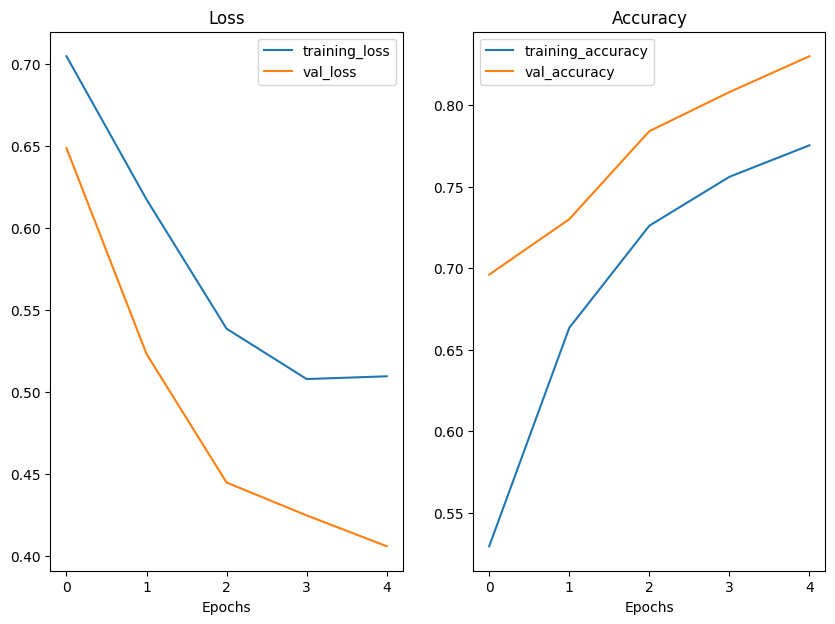

In [ ]:
plt_loss_curves(model_7_history)

### 7. Repeat until satisfied

Since we're already beaten our baseline, there are a few things we could try continue to improve our model:

* Increase the number of model layers (e.g. add moe `Conv2D`/`MaxPool2d` layers)
* Increase teh number of filters in each convolutional layer (e.g 10 to 32 or even 64)
* tarin for longer (more epochs)
* Find a ideal learning rate
* Get more data (give model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case

> 🧰 **Prectice:** Recreate the model on the CNN explainer website (same as ` mdoel_1) and see hoe it's performs on the augmented shuffled trainig data.

In [ ]:
model_8 = Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          strides=1,
                          activation="relu",
                          input_shape=(224, 224, 3)
                         ),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid")
])



In [ ]:
model_8.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_8_history = model_8.fit(train_data_augmented_shuffled,
            epochs=5,
            steps_per_epoch=len(train_data_augmented_shuffled),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 23s 448ms/step - loss: 0.6335 - accuracy: 0.6267 - val_loss: 0.4626 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 23s 494ms/step - loss: 0.5456 - accuracy: 0.7260 - val_loss: 0.4355 - val_accuracy: 0.8140
Epoch 3/5
47/47 [==============================] - 21s 457ms/step - loss: 0.5171 - accuracy: 0.7587 - val_loss: 0.3945 - val_accuracy: 0.8480
Epoch 4/5
47/47 [==============================] - 22s 471ms/step - loss: 0.5128 - accuracy: 0.7467 - val_loss: 0.3771 - val_accuracy: 0.8400
Epoch 5/5
47/47 [==============================] - 23s 494ms/step - loss: 0.5102 - accuracy: 0.7567 - val_loss: 0.4089 - val_accuracy: 0.8280


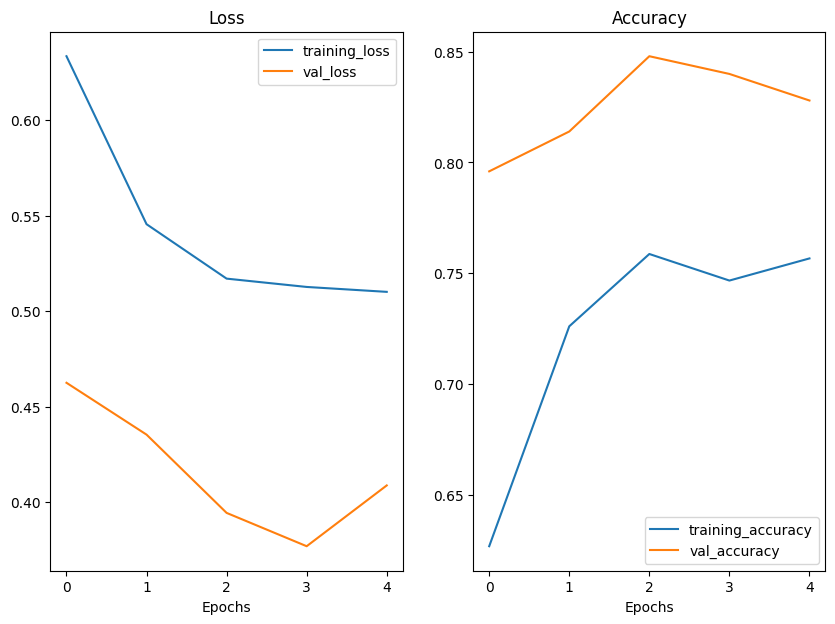

In [ ]:
plt_loss_curves(model_8_history)

### Making a prediction with our trained model on our own dataset

In [ ]:
# Classes we're working with

print(class_names)

['pizza' 'steak']


In [ ]:
# View our example image

!wget https://static01.nyt.com/images/2023/12/07/multimedia/LH-Flank-steak/nd-cucumber-salad-hwtv-articleLarge.jpg

--2024-05-18 05:26:35--  https://static01.nyt.com/images/2023/12/07/multimedia/LH-Flank-steak/nd-cucumber-salad-hwtv-articleLarge.jpg
Resolving static01.nyt.com (static01.nyt.com)... 151.101.1.164, 151.101.65.164, 151.101.129.164, ...
Connecting to static01.nyt.com (static01.nyt.com)|151.101.1.164|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137944 (135K) [image/jpeg]
Saving to: ‘nd-cucumber-salad-hwtv-articleLarge.jpg.1’

nd-cucumber-salad-h 100%[===================>] 134.71K  --.-KB/s    in 0.03s   

2024-05-18 05:26:35 (3.93 MB/s) - ‘nd-cucumber-salad-hwtv-articleLarge.jpg.1’ saved [137944/137944]



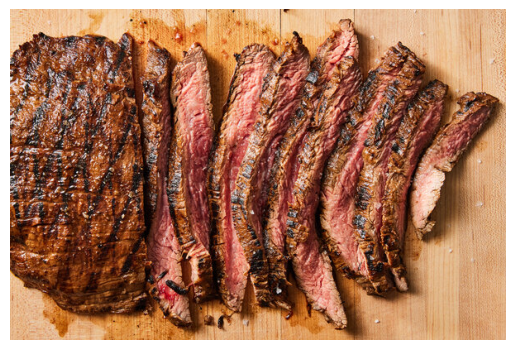

In [ ]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt


steak = mpimg.imread("nd-cucumber-salad-hwtv-articleLarge.jpg")

plt.imshow(steak)
plt.axis(False)
plt.show()

In [ ]:
# Heck the dahpe of our image

steak.shape

(400, 600, 3)

array([[[237, 194, 151],
        [243, 201, 161],
        [239, 200, 161],
        ...,
        [241, 194, 152],
        [195, 147, 101],
        [239, 189, 140]],

       [[238, 195, 150],
        [240, 198, 156],
        [236, 194, 156],
        ...,
        [230, 183, 141],
        [213, 165, 119],
        [234, 184, 135]],

       [[244, 200, 155],
        [244, 201, 158],
        [234, 192, 152],
        ...,
        [220, 171, 128],
        [247, 196, 149],
        [229, 179, 130]],

       ...,

       [[219, 171, 125],
        [239, 190, 147],
        [227, 178, 135],
        ...,
        [227, 179, 139],
        [221, 172, 132],
        [224, 175, 134]],

       [[224, 176, 130],
        [238, 189, 146],
        [225, 176, 133],
        ...,
        [224, 176, 136],
        [220, 171, 131],
        [228, 179, 138]],

       [[227, 179, 133],
        [239, 190, 147],
        [226, 177, 134],
        ...,
        [220, 172, 132],
        [218, 169, 129],
        [229, 180, 139]]], dtype=uint8)
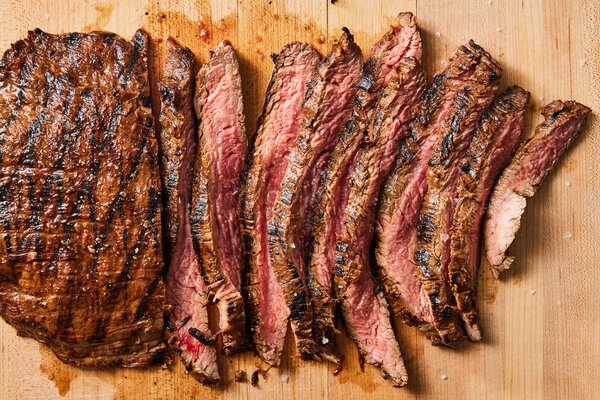

In [ ]:
steak

In [ ]:
expanded_steak = tf.expand_dims(steak, axis=0).shape

> 🔑 **Note:** when you train a neural network and you want to make a prediction with it on your own custom dtat, it's important than your custom dtat (or new data) is prepocessed into the shame format as the dat your mdoel was trained on.

In [30]:
# Creat a function to import an image and resize it to be able to be uses with our model

def load_and_prep_image(filename, img_shape=224):
  """
  Reads in an image from filename, turns it into a tensor and reshapes into
  (224, 224, 3).
  """
  # Read in the image
  img = tf.io.read_file(filename)
  # Decode it into a tensor
  img = tf.image.decode_jpeg(img)
  # Resize the image
  img = tf.image.resize(img, [img_shape, img_shape])
  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img



In [ ]:
steak = load_and_prep_image("nd-cucumber-salad-hwtv-articleLarge.jpg")

In [ ]:
steak.shape

TensorShape([224, 224, 3])

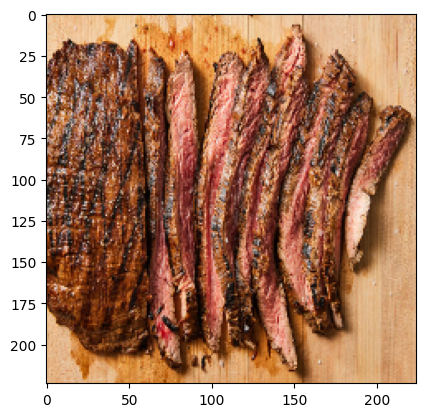

In [ ]:
plt.imshow(steak)

In [ ]:
pred = model_8.predict(tf.expand_dims(steak, axis=0))

1/1 [==============================] - 0s 293ms/step


Looks like our custom image is being put through our model however, it currently outputs a predction probability, wouldn't it be nice if we could visualize image as well as the mdoel's prediction?

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
# We cal index the predctions class by rounding probability and indexing it on class_names

pred_class = class_names[int(tf.round(pred)[0][0])]

pred_class

'steak'

In [44]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)
  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))
  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]
  # Plot the image and predicted
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);
  return pred

#p = pred_and_plot(model_8, "nd-cucumber-salad-hwtv-articleLarge.jpg", class_names)

In [ ]:
p = pred_and_plot(model_8, "nd-cucumber-salad-hwtv-articleLarge.jpg", class_names)

### Our model works! Let's try another image.. this time pizza 🍕

In [ ]:
!wget https://www.minhareceita.com.br/app/uploads/2022/12/Dpizza-de-pepperoni-caseira-portal-minha-receita.jpg

--2024-05-18 05:26:38--  https://www.minhareceita.com.br/app/uploads/2022/12/Dpizza-de-pepperoni-caseira-portal-minha-receita.jpg
Resolving www.minhareceita.com.br (www.minhareceita.com.br)... 192.124.249.160
Connecting to www.minhareceita.com.br (www.minhareceita.com.br)|192.124.249.160|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64999 (63K) [image/jpeg]
Saving to: ‘Dpizza-de-pepperoni-caseira-portal-minha-receita.jpg.1’

Dpizza-de-pepperoni 100%[===================>]  63.48K  --.-KB/s    in 0.02s   

2024-05-18 05:26:38 (2.94 MB/s) - ‘Dpizza-de-pepperoni-caseira-portal-minha-receita.jpg.1’ saved [64999/64999]



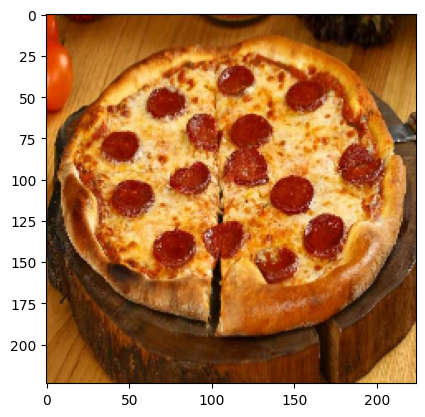

In [ ]:
pizza = load_and_prep_image("Dpizza-de-pepperoni-caseira-portal-minha-receita.jpg")

plt.imshow(pizza)

1/1 [==============================] - 0s 18ms/step


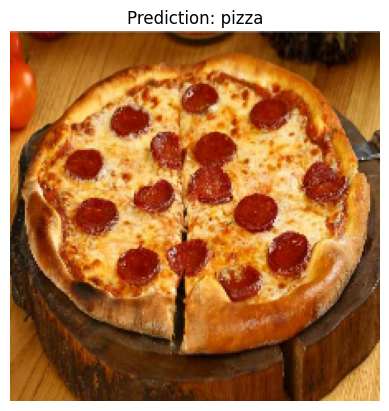

In [ ]:
p = pred_and_plot(model_8, "Dpizza-de-pepperoni-caseira-portal-minha-receita.jpg", class_names)

# Multi-class image classification

We've been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 class of food (multi-clas classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a mode (start with a baseline)
4. Fit the model (overfit it to mmake sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat the baseline/reduce overfitting)
7. Repear until satified

In [5]:
# 1 . Import and become one with the date
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", 'r')
zip_ref.extractall()
zip_ref.close()

--2024-05-19 16:12:04--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.207, 142.250.145.207, 74.125.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  41.6MB/s    in 15s     

2024-05-19 16:12:19 (33.6 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [6]:
import os

for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/test'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/sushi'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/steak'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data/test/pizza'.
There are 

In [7]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 May 19 16:12 .
drwxr-xr-x  1 root root 4096 May 19 16:12 ..
drwxr-xr-x 12 root root 4096 May 19 16:12 test
drwxr-xr-x 12 root root 4096 May 19 16:12 train


In [8]:
# Setup the train and test directories

train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [9]:
# Let's get the subdiretories (these are our class names)
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['374064.jpg']
Image shape: (384, 512, 3)


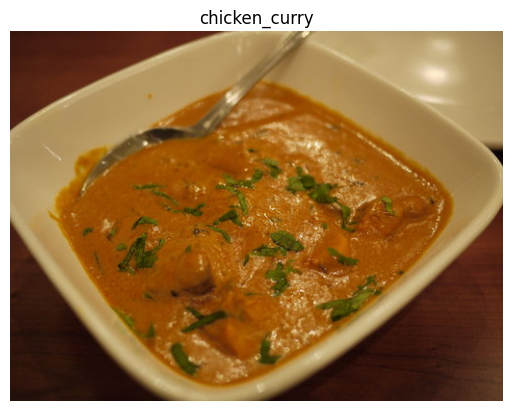

In [10]:
#Visualize, visualize, visualize
import random

img = view_random_image(train_dir, random.choice(class_names))

### 3. Preprocess teh data (prepare it for the model)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Read images from directories and
# augment them in the same way

train_data = train_datagen.flow_from_directory(train_dir,
                                                          target_size=(224, 224),
                                                          batch_size=32,
                                                          class_mode="categorical")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a model (start with baseline)

We've been talking a lot about the [CNN  Explainer website](https://poloclub.github.io/cnn-explainer/)

In [12]:

# Create our model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

model_9 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    Activation(activation='relu'),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") # changed to have 10 output neurons and use softmax activation function
])

In [13]:
# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [14]:
# Fit teh model
history_9 = model_9.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 38s 139ms/step - loss: 2.1297 - accuracy: 0.2280 - val_loss: 1.9679 - val_accuracy: 0.2848
Epoch 2/5
235/235 [==============================] - 31s 132ms/step - loss: 1.8211 - accuracy: 0.3776 - val_loss: 1.9309 - val_accuracy: 0.3380
Epoch 3/5
235/235 [==============================] - 32s 136ms/step - loss: 1.3170 - accuracy: 0.5597 - val_loss: 2.1059 - val_accuracy: 0.3012
Epoch 4/5
235/235 [==============================] - 31s 133ms/step - loss: 0.6024 - accuracy: 0.8084 - val_loss: 2.8878 - val_accuracy: 0.2712
Epoch 5/5
235/235 [==============================] - 31s 133ms/step - loss: 0.1764 - accuracy: 0.9509 - val_loss: 4.4101 - val_accuracy: 0.2508


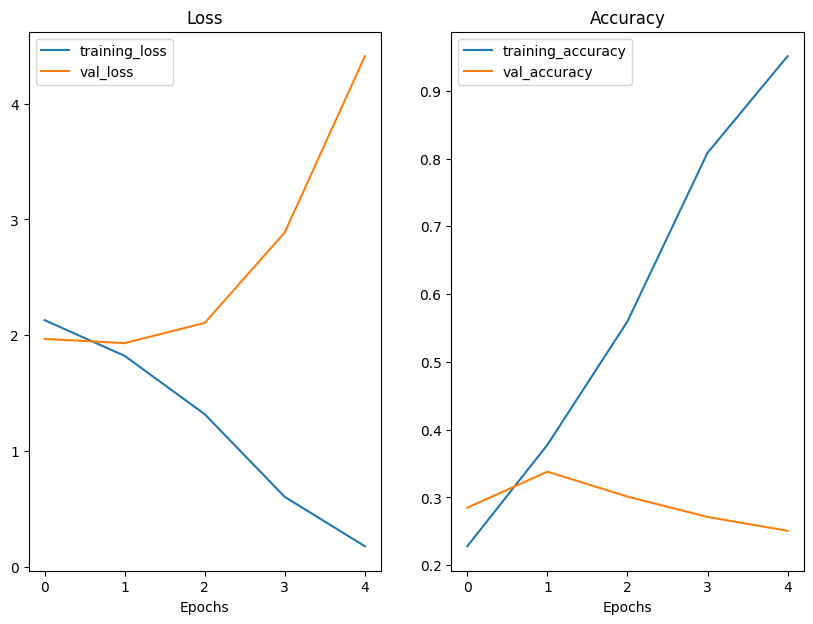

In [15]:
plt_loss_curves(history_9)

What do these loss curves tell us?

Well... it seems out model is **overfitting** the training set quite badly.. inother words, it's gettign great results on the training data but fails to generalize well to unseen data an peerform poorly on the test dataset.

In [16]:
len(train_data)

235

### 5. Evaluate the model

In [17]:
model_9.evaluate(test_data)

79/79 [==============================] - 9s 117ms/step - loss: 4.4101 - accuracy: 0.2508


[4.410100936889648, 0.2508000135421753]

## 6. Adjust the hyperparameters (to beat the baseline/reduce overfitting)

Due to its performing on the training data, it's clear our model is learning something...

However, it's not generalizing to un seen dta (overfitting)

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may too complicated of a model, onde way to simplify teh model is to: reduce # of layers or reduce # hidden units inlayers.
* **Use data augmentation** - dta augmentation manipulates the training data in such a way to add  more diversity to it (without altering the original data).
* **User teh transfer learning** - transfer learning leverages the patterns another model has learned on similar dta to your own and allows you to use patterns on your on dataset.


In [ ]:
# How about we try to simplify orur model first
# lets try to remove 2 convolutional layers...

model_10 = Sequential([
    Conv2D(10, 3, input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax") # changed to have 10 output neurons and use softmax activation function
])

In [ ]:
model_10.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
model_10_history = model_10.fit(train_data,
            epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 30s 120ms/step - loss: 2.1892 - accuracy: 0.2212 - val_loss: 2.0391 - val_accuracy: 0.2816
Epoch 2/5
235/235 [==============================] - 28s 117ms/step - loss: 1.7907 - accuracy: 0.3996 - val_loss: 2.0503 - val_accuracy: 0.3192
Epoch 3/5
235/235 [==============================] - 29s 121ms/step - loss: 1.4065 - accuracy: 0.5320 - val_loss: 2.1033 - val_accuracy: 0.2984
Epoch 4/5
235/235 [==============================] - 27s 115ms/step - loss: 0.9851 - accuracy: 0.6907 - val_loss: 2.3471 - val_accuracy: 0.2820
Epoch 5/5
235/235 [==============================] - 33s 140ms/step - loss: 0.6049 - accuracy: 0.8247 - val_loss: 2.9693 - val_accuracy: 0.2756


### Trying to reduce overfiting with data augmentation

Let's try improve our model's results by using augmented training data...

Ideally, we want to:

* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy


In [21]:
# Create an augmneted data generator instance

train_datagen_augmented = ImageDataGenerator(rescale=1/ 255.,
                                              rotation_range=0.2,
                                              shear_range=0.2,
                                              zoom_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                             horizontal_flip=True
                                             )

In [22]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode="categorical")

Found 7500 images belonging to 10 classes.


In [23]:
# Create a model
model_11 = tf.keras.models.clone_model(model_9)

In [24]:
model_11.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [25]:
history_11 = model_11.fit(train_data_augmented,
            epochs=5,
            steps_per_epoch=len(train_data_augmented),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 119s 497ms/step - loss: 2.1837 - accuracy: 0.2008 - val_loss: 1.9689 - val_accuracy: 0.2872
Epoch 2/5
235/235 [==============================] - 113s 478ms/step - loss: 2.0442 - accuracy: 0.2785 - val_loss: 1.9319 - val_accuracy: 0.3340
Epoch 3/5
235/235 [==============================] - 112s 479ms/step - loss: 1.9756 - accuracy: 0.3108 - val_loss: 1.8335 - val_accuracy: 0.3776
Epoch 4/5
235/235 [==============================] - 120s 512ms/step - loss: 1.9391 - accuracy: 0.3287 - val_loss: 1.9156 - val_accuracy: 0.3332
Epoch 5/5
235/235 [==============================] - 156s 663ms/step - loss: 1.9071 - accuracy: 0.3427 - val_loss: 1.8193 - val_accuracy: 0.4000


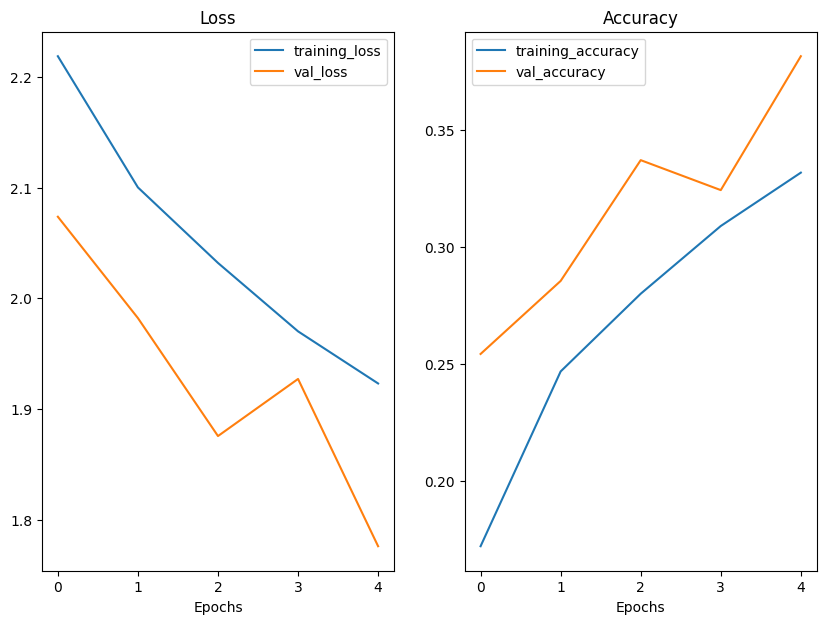

In [ ]:
plt_loss_curves(history_11)

In [ ]:
model_11.evaluate(test_data)

79/79 [==============================] - 10s 117ms/step - loss: 1.7763 - accuracy: 0.3816


[1.7763429880142212, 0.3815999925136566]

In [ ]:
model_9.evaluate(test_data)

79/79 [==============================] - 6s 79ms/step - loss: 4.1770 - accuracy: 0.2796


[4.177015781402588, 0.27959999442100525]

### 7. Repeat until satisfied

We could kepp goinf here... cxonditinally tring to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:

- restructuring our model's archtecture (increasing layers/ hidden units)
- adjust the learning rate
- try diffrente method of dta augmentation (adjust hyperparameters in or ImageDataGenerator instance).
- training for long (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

In [26]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [33]:
pizza = load_and_prep_image("Dpizza-de-pepperoni-caseira-portal-minha-receita.jpg")
steak = load_and_prep_image("nd-cucumber-salad-hwtv-articleLarge.jpg")

In [41]:
# Make a prediciton with model 11

pred_and_plot(model_11, "Dpizza-de-pepperoni-caseira-portal-minha-receita.jpg", class_names)

1/1 [==============================] - 0s 18ms/step


TypeError: only length-1 arrays can be converted to Python scalars

1/1 [==============================] - 0s 18ms/step


array([[2.0665152e-07, 2.8849786e-02, 1.6061177e-09, 9.2527393e-05,
        7.1725139e-05, 1.2858100e-05, 7.3140518e-06, 1.5310966e-06,
        9.7094011e-01, 2.3921595e-05]], dtype=float32)

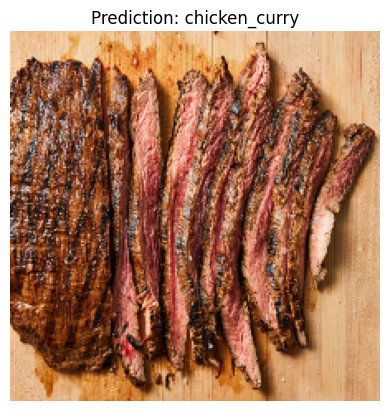

In [45]:
pred_and_plot(model_11, "nd-cucumber-salad-hwtv-articleLarge.jpg", class_names)

Looks like our model didin't perform very well on our custom image but this is because it only achieved ~35% accuracy on the test data. So we can expect it to function quite poorly on other unseen data.

## Saving and load a model

In [46]:
# Save a model

model_11.save("10_food_classes_model_11")

In [47]:
# Load it in a trained model and evaluate it

loaded_model_11 = tf.keras.models.load_model("10_food_classes_model_11")

loaded_model_11.evaluate(test_data)

79/79 [==============================] - 8s 100ms/step - loss: 1.8193 - accuracy: 0.4000


[1.8192921876907349, 0.4000000059604645]

In [48]:
# Compore ou loaded model to our existing model
model_11.evaluate(test_data)

79/79 [==============================] - 8s 102ms/step - loss: 1.8193 - accuracy: 0.4000


[1.8192927837371826, 0.4000000059604645]

In [49]:
model_11.save("10_food_classes_model_11.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [50]:
loaded_mode_11_h5 = tf.keras.models.load_model("10_food_classes_model_11.h5")

loaded_mode_11_h5.evaluate(test_data)

79/79 [==============================] - 8s 94ms/step - loss: 1.8193 - accuracy: 0.4000


[1.8192921876907349, 0.4000000059604645]